In [8]:
#Importing all the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore", UserWarning)

In [9]:
#Reading the cleaned patients data 
data_patients = pd.read_csv("final_patients.csv")

In [12]:
#Creating a copy of the original data to work on, so that the original data is not modified
df_patients=data_patients.copy()
print(df_patients.head())

  patient_id        date      time  glucose  calories  heart_rate  steps  \
0  HUPA0001P  2018-06-13  18:40:00    332.0    6.3595   82.322835   34.0   
1  HUPA0001P  2018-06-13  18:45:00    326.0    7.7280   83.740157    0.0   
2  HUPA0001P  2018-06-13  18:50:00    330.0    4.7495   80.525180    0.0   
3  HUPA0001P  2018-06-13  18:55:00    324.0    6.3595   89.129032   20.0   
4  HUPA0001P  2018-06-13  19:00:00    306.0    5.1520   92.495652    0.0   

   basal_rate  bolus_volume_delivered  carb_input  calories_cleaned  \
0    0.091667                     0.0         0.0              6.36   
1    0.091667                     0.0         0.0              7.73   
2    0.091667                     0.0         0.0              4.75   
3    0.091667                     0.0         0.0              6.36   
4    0.075000                     0.0         0.0              5.15   

   heart_rate_cleaned  basal_rate_cleaned  
0                82.3              0.0917  
1                83.7       

 Q1. What is the most common hour of the day for glucose spikes across all patients?

Reasoning:
Identifying peak glucose hours helps uncover behavioral or physiological patterns — such as post-meal spikes or medication timing effects. 
This insight can guide personalized scheduling for interventions or alerts.


In [88]:
import pandas as pd

# === Step 0: Load the cleaned CSV ===
# Make sure 'date' and 'time' are read as strings so we preserve them exactly
df_patients = pd.read_csv("final_patients.csv", dtype={'date': str, 'time': str})

# === Step 1: Combine date and time into a single datetime column ===
df_patients['datetime'] = pd.to_datetime(
    df_patients['date'] + ' ' + df_patients['time'],
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)

# === Step 2: Extract the hour from the datetime ===
df_patients['hour'] = df_patients['datetime'].dt.hour

# === Step 3: Group by hour and calculate average glucose ===
# Drop rows with missing glucose values to avoid NaNs in the mean
glucose_by_hour = (
    df_patients
    .dropna(subset=['glucose'])
    .groupby('hour')['glucose']
    .mean()
)

# === Step 4: Identify the hour with the highest average glucose ===
peak_hour = glucose_by_hour.idxmax()
peak_value = glucose_by_hour.max()

# === Step 5: Print the results ===
print("\nQ. What is the most common hour of the day for glucose spikes across all patients?")
print("-" * 90)
print(f"Highest average glucose occurs at hour: {peak_hour}:00")
print(f"Average glucose at that hour: {peak_value:.2f} mg/dL")

print("\nReasoning: Identifying the hour with peak glucose levels helps uncover behavioral or physiological patterns—")
print("such as post-meal spikes or medication timing effects. This insight can guide personalized scheduling for")
print("interventions, alerts, or lifestyle adjustments.")



Q. What is the most common hour of the day for glucose spikes across all patients?
------------------------------------------------------------------------------------------
Highest average glucose occurs at hour: 19:00
Average glucose at that hour: 152.56 mg/dL

Reasoning: Identifying the hour with peak glucose levels helps uncover behavioral or physiological patterns—
such as post-meal spikes or medication timing effects. This insight can guide personalized scheduling for
interventions, alerts, or lifestyle adjustments.


Q2. Which patient has the highest variability in heart rate, and what might that indicate?
Reasoning:
High variability may signal stress, inconsistent sleep, or cardiovascular irregularities. 
Flagging such patients enables targeted review and potential clinical follow-up.


In [90]:
# Calculate heart rate variability
hr_variability = df_patients.groupby('patient_id')['heart_rate_cleaned'].std()
most_variable_patient = hr_variability.idxmax()
highest_std = hr_variability.max()

# Print the result
print("\nQ. Which patient shows the highest heart rate variability?")
print("-" * 80)
print(f"Patient ID with highest variability: {most_variable_patient}")
print(f"Standard deviation of heart rate: {highest_std:.2f} bpm")

print("\nReasoning: High heart rate variability may indicate fluctuating stress levels, autonomic imbalance,")
print("or inconsistent measurement conditions. Identifying such patients can help flag cases for deeper")
print("clinical review or personalized monitoring strategies.")



Q. Which patient shows the highest heart rate variability?
--------------------------------------------------------------------------------
Patient ID with highest variability: HUPA0019P
Standard deviation of heart rate: 19.69 bpm

Reasoning: High heart rate variability may indicate fluctuating stress levels, autonomic imbalance,
or inconsistent measurement conditions. Identifying such patients can help flag cases for deeper
clinical review or personalized monitoring strategies.


Q3. How many patients show consistent sleep disturbances (>30%) for at least 10 consecutive days?
Reasoning:
Short-term spikes may be noise, but sustained sleep issues suggest chronic patterns. This helps prioritize patients for behavioral or therapeutic support.

In [38]:
#Reading the cleaned patients_demographics data 
patients_demo = pd.read_csv("patients_demography.csv")

In [100]:
import pandas as pd
from datetime import datetime

# Step 1: Preprocess and flag disturbances
def preprocess_sleep_data(df, threshold=30):
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    df = df.sort_values(['patient_id', 'date'])
    df['disturbed'] = df['sleep_disturbances_percentage'] > threshold
    return df

# Step 2: Count streaks per patient
def count_streaks(group, min_days=10):
    streak = 0
    max_streak = 0
    for disturbed in group['disturbed']:
        if disturbed:
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak >= min_days

# Step 3: Apply streak detection across patients
def detect_sleep_streaks(df, threshold=30, min_days=10):
    df = preprocess_sleep_data(df, threshold)
    consistent_flags = df.groupby('patient_id').apply(lambda group: count_streaks(group, min_days))
    consistent_ids = consistent_flags[consistent_flags].index.tolist()
    return consistent_flags, consistent_ids

# Step 4: Run detection and summarize
consistent_flags, consistent_ids = detect_sleep_streaks(patients_demo, threshold=30, min_days=10)
num_consistent = len(consistent_ids)

# Step 5: Output results
print("\nQ. How many patients show consistent sleep disturbances (>30%) for at least 10 consecutive days?")
print("-" * 90)
print(f"Answer: {num_consistent} patients")

print("\nReasoning: Sustained sleep disturbances may signal chronic stress, hormonal imbalance, or lifestyle factors.")
print("Identifying these patients helps prioritize interventions like sleep hygiene education, stress management,")
print("or clinical evaluation for underlying conditions.")



Q. How many patients show consistent sleep disturbances (>30%) for at least 10 consecutive days?
------------------------------------------------------------------------------------------
Answer: 20 patients

Reasoning: Sustained sleep disturbances may signal chronic stress, hormonal imbalance, or lifestyle factors.
Identifying these patients helps prioritize interventions like sleep hygiene education, stress management,
or clinical evaluation for underlying conditions.


C:\Users\mktem\AppData\Local\Temp\ipykernel_33732\3351415099.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consistent_flags = df.groupby('patient_id').apply(lambda group: count_streaks(group, min_days))


Q4. What is the average number of records per day per patient, and does it vary significantly?
Reasoning:
This helps identify potential predictors or influencers of glucose, guiding feature selection for downstream modeling and hypothesis generation.

In [98]:
import pandas as pd

# === Step 0: Load the cleaned CSV ===
df_patients = pd.read_csv("final_patients.csv", dtype={'date': str})

# === Step 1: Count records per patient per day ===
records_per_day = df_patients.groupby(['patient_id', 'date']).size()

# === Step 2: Calculate average records/day per patient ===
avg_records = records_per_day.groupby('patient_id').mean()

# === Step 3: Measure variation across patients ===
variation = avg_records.std()

# === Step 4: Print results ===
print("\nQ. What is the average number of records per day per patient, and how much does it vary?")
print("-" * 90)
print(f"Average records/day per patient: {avg_records.mean():.1f}")
print(f"Standard deviation across patients: {variation:.1f}")

print("\nReasoning: This metric reflects data density and monitoring consistency.")
print("High variation may indicate device issues, patient non-compliance, or irregular logging patterns.")
print("Understanding this helps assess data reliability and guides preprocessing for downstream modeling.")



Q. What is the average number of records per day per patient, and how much does it vary?
------------------------------------------------------------------------------------------
Average records/day per patient: 272.5
Standard deviation across patients: 8.8

Reasoning: This metric reflects data density and monitoring consistency.
High variation may indicate device issues, patient non-compliance, or irregular logging patterns.
Understanding this helps assess data reliability and guides preprocessing for downstream modeling.


Q5. What is the average basal rate by hour of day?
Reasoning:
Insulin pumps often follow circadian rhythms — lower basal rates at night, higher during early morning due to dawn phenomenon.
By plotting this as a line chart, you can visually detect whether patients are receiving appropriate basal adjustments across the day.
This also helps validate whether your time-splitting logic (hour feature) is working as intended.


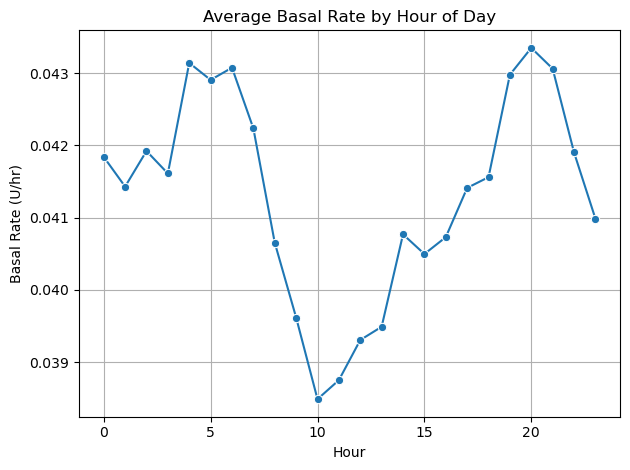

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'time' column is in datetime format
df_patients['time'] = pd.to_datetime(df_patients['time'])

# Extract hour from time
df_patients['hour'] = df_patients['time'].dt.hour

# Group by hour and calculate average basal rate
hourly_avg = df_patients.groupby('hour')['basal_rate_cleaned'].mean().reset_index()

# Plot the average basal rate by hour
sns.lineplot(data=hourly_avg, x='hour', y='basal_rate_cleaned', marker='o')
plt.title('Average Basal Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Basal Rate (U/hr)')
plt.grid(True)
plt.tight_layout()
plt.show()



Q6. How does Glucose levels of the patients vary accross weekdays?
Reasoning:
Lifestyle factors (diet, stress, sleep) often fluctuate across the week — weekends may show higher glucose due to irregular routines.
This question helps uncover behavioral patterns and can inform personalized education or intervention strategies.
It also validates your dayofweek feature engineering and gives a quick sanity check on data coverage across days.


C:\Users\mktem\AppData\Local\Temp\ipykernel_33732\920509193.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_avg, x='day_name', y='glucose', palette='coolwarm')


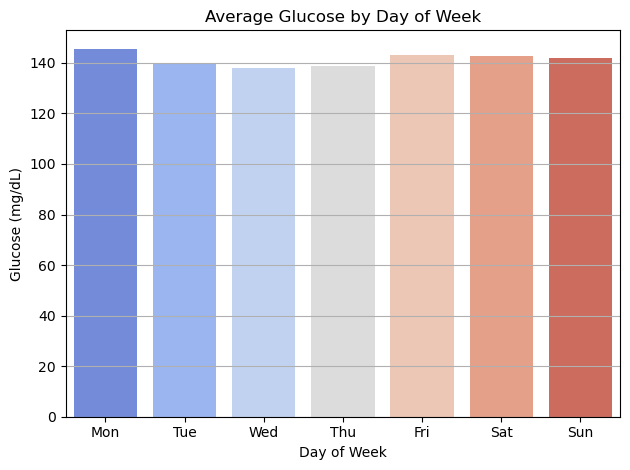

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'date' column is in datetime format
df_patients['date'] = pd.to_datetime(df_patients['date'])

# Extract day of week (0 = Monday, 6 = Sunday)
df_patients['dayofweek'] = df_patients['date'].dt.dayofweek

# Group and calculate average glucose
weekday_avg = df_patients.groupby('dayofweek', as_index=False)['glucose'].mean()
weekday_avg['glucose'] = weekday_avg['glucose'].round(1)

# Map numeric day to weekday name
weekday_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_avg['day_name'] = weekday_avg['dayofweek'].map(dict(enumerate(weekday_names)))

# Plot
sns.barplot(data=weekday_avg, x='day_name', y='glucose', palette='coolwarm')
plt.title('Average Glucose by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Glucose (mg/dL)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
